In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telcom-customer-churn/Telco-Customer-Churn.csv


#  Telecom Dataset for Customer Churn

1. Dataset Description ¶

The dataset provided is from a telecom company which has a record of customer information and their churn.
Our goal is to predict the customers who might stop using their services.
It's a binary classification problem since we have our target column, the churn variable with values 0(No) or 1(yes)

Column Description :

    Customer ID : Unique ID of customer
    gender : Two categories Male and Female
    Senior Citizen : Two categories 0 or 1
    Partner : Yes or No
    Dependents : Yes or No
    tenure : How long have they been with the company
    Phone Service : Yes or No
    Multiple Lines : Yes, No or No phone service
    Internet Service : DSL, Fiber Optics or No
    Online Security : Yes, No or No internet service
    Online Backup : Yes, No or No internet service
    Device Protection : Yes, No or No internet service
    Tech Support : Yes, No or No internet service
    Streaming TV : Yes, No or No internet service
    Streaming Movies : Yes, No or No internet service
    Contract : Month-to-month, One year, Two year
    Paperless Biling : Yes or No
    Payment Method : Electronic check, Mailed check, Bank Transfer(automatic), Credit Card(automatic)
    Monthly Charges : Numeric value
    Total Charges : Numeric value
    Churn : Yes or No



In [2]:
#importation of data manipulation, plotting and grid formating Modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

#metrics evaluation Modules
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score

In [3]:
from matplotlib import rcParams

# figure size in inches
from IPython.core.pylabtools import figsize

In [4]:
pd.set_option('display.max_columns',21)
Teldata = pd.read_csv('/kaggle/input/telcom-customer-churn/Telco-Customer-Churn.csv')

# 1.DATA PREPARATION AND FORMATTING

In [5]:
Teldata.shape

(7043, 21)

In [6]:
Teldata.head()#showing a snapshot of the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
Teldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**From the data, we have 21 columns among those; we have 3 numerical columns and 18 categorical columns.
We can also see that there are no variables with missing data.
Lets reformat the totalcharges variable from categorical to numerical variable.**

In [8]:
Teldata['TotalCharges']=pd.to_numeric(Teldata['TotalCharges'],errors='coerce')

In [9]:
#convertion to numeric type creates some null value in this column.
Teldata['TotalCharges'].isnull().sum() 

11

In [10]:
#lets fill in the null value with the median value of the column
Teldata['TotalCharges']= Teldata['TotalCharges'].fillna(Teldata['TotalCharges'].median())

In [11]:
#The nan values are now filled.
Teldata['TotalCharges'].isnull().sum()

0

In [12]:
#brief summary on the numerical columns
Teldata.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**We have four numerical type columns displayed above with maximum tenure of 72 years of a customer,
Maximum monthly charge being 118 with a mean of 18.**

In [13]:
#preprocessing on the target variable
Teldata['Churn']=Teldata['Churn'].map({'Yes':'lost_Customers','No':'present_Customers'})

In [14]:
Teldata['Churn'].value_counts()

present_Customers    5174
lost_Customers       1869
Name: Churn, dtype: int64

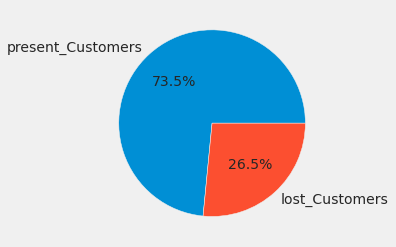

In [15]:
churn_data=Teldata['Churn'].value_counts()
churn_data
piechart=plt.pie(x=churn_data,labels=churn_data.keys(),autopct="%.1f%%")

Text(0, 0.5, 'Frequency')

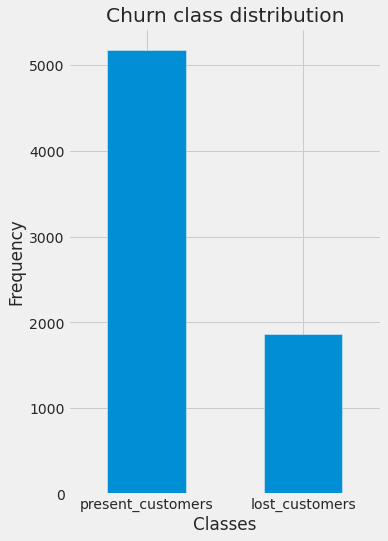

In [16]:
# Let's plot the Churn class against the Frequency
fig = plt.figure(figsize=(5,8))

labels = ['present_customers','lost_customers']
classes = pd.value_counts(Teldata['Churn'], sort = True)
classes.plot(kind = 'bar',rot=0)
plt.title("Churn class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Classes")
plt.ylabel("Frequency")

**Considering the plots above(pie plot and bar plot)
There is some class imbalance in the churn variable where the lost customers are about 1/4 of the present customers ; There are 73.5% present customers  and 26.5% lost customers .
The imbalance in the dataset may lead to predictors making false positives/negatives because the churn data is undersampled.The ratio of existing customers to lost customers is not proportionate. We will deal with this issue during the modelling phase**

# **2.EXPLANATORY DATA ANALYSIS**

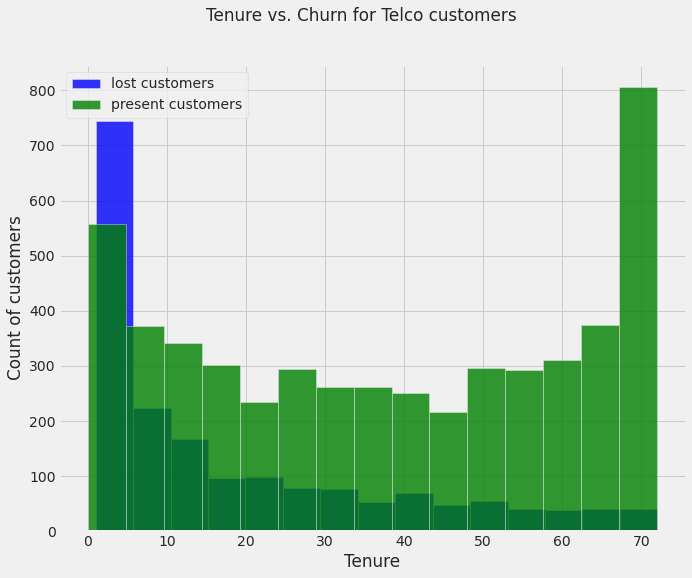

In [17]:
#Lets looks at the relationship between Churn Variable values and the Tenure
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(Teldata[Teldata["Churn"]=='lost_Customers']["tenure"], bins=15, alpha=0.8, color="blue", label="lost customers")
ax.hist(Teldata[Teldata["Churn"]=='present_Customers']["tenure"], bins=15, alpha=0.8, color="green", label="present customers")

ax.set_xlabel("Tenure")
ax.set_ylabel("Count of customers")

fig.suptitle("Tenure vs. Churn for Telco customers")

ax.legend();

**Generally the highest number of lost customers had a lower tenure of between 0-5. The histogram becomes skewed with increasing tenure with the least number of lost customers having a tenure of between 55 to 70.
Generally, we had more present customers with a tenure between 0 and 5, 
The number of present customers gradualy decreases with increasing tenure and reverses between 50-70 where we see an increase in the number of present customers with most of them having a tenure of between 65-70..**

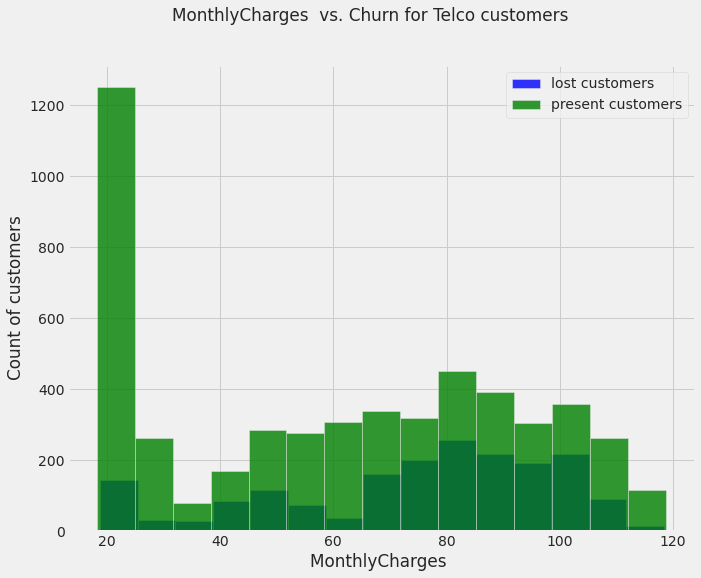

In [18]:
#Lets look at the relationship between the values of the Churn Variable and the Monthly Charges
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(Teldata[Teldata["Churn"]=='lost_Customers']["MonthlyCharges"], bins=15, alpha=0.8, color="blue", label="lost customers")
ax.hist(Teldata[Teldata["Churn"]=='present_Customers']["MonthlyCharges"], bins=15, alpha=0.8, color="green", label="present customers")

ax.set_xlabel("MonthlyCharges ")
ax.set_ylabel("Count of customers")

fig.suptitle("MonthlyCharges  vs. Churn for Telco customers")

ax.legend();

**The histogram becomes fairly skewed with increasing Monthly Charges with the highest number of present customers having a monthy charge of between 20 and 25.
Generally, there are few lost customers whose monthly charges ranges from 25-65.
The highest number of lost customers had a monthly charge of between 65-110**

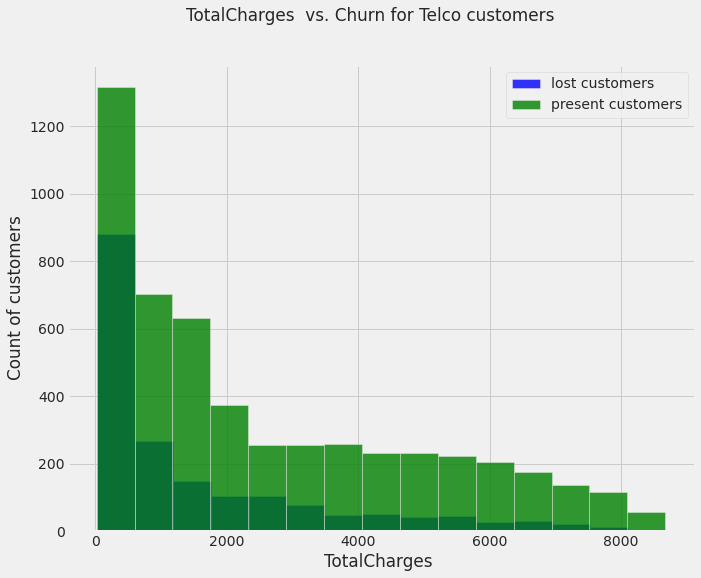

In [19]:
#Lets look at the relationship between Total charges and the individual values of the Churn Variable.
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(Teldata[Teldata["Churn"]=='lost_Customers']["TotalCharges"], bins=15, alpha=0.8, color="blue", label="lost customers")
ax.hist(Teldata[Teldata["Churn"]=='present_Customers']["TotalCharges"], bins=15, alpha=0.8, color="green", label="present customers")

ax.set_xlabel("TotalCharges ")
ax.set_ylabel("Count of customers")

fig.suptitle("TotalCharges  vs. Churn for Telco customers")

ax.legend();

**Considering the histogram above, the highest number of lost customers had a total monthly charge of between 0-500, the number of lost customers becomes highly skewed with increase in the total charges.
We can also see that the highest number of present customers have a total charge of between 0-500 and decreases to between 500-2000, the numbers continue to gradualy decrease with increase in the total charge..**

**Since the variable seniorcitizen has two possible values 1 or 0 , True or False, lets set it's 
data type to a categorical type.**

In [20]:
Teldata['SeniorCitizen']=Teldata['SeniorCitizen'].astype('O')

In [21]:
#brief summary on the numerical columns
Teldata.describe(include=['O'])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,9840-EFJQB,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,present_Customers
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [22]:
Teldata['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

**The code above shows us that the senior citizens are about 1/4 of all the customers who have used the service.**

In [23]:
Teldata.groupby(['SeniorCitizen','Churn']).customerID.count()

SeniorCitizen  Churn            
0              lost_Customers       1393
               present_Customers    4508
1              lost_Customers        476
               present_Customers     666
Name: customerID, dtype: int64

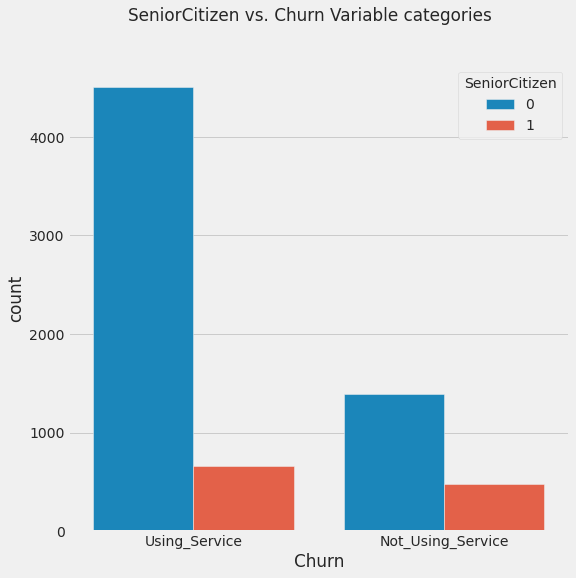

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="SeniorCitizen", data=Teldata,ax=ax)
ax.legend(title="SeniorCitizen")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("SeniorCitizen vs. Churn Variable categories");

**We can see that from the code above, among those using the service,the Seniorcitizen are about 1/4 of them.
Among those who have left the Service,the SeniorCitizens are also about 1/4 of them as well**

In [25]:
#Code below shows that we had more almost same number of males and females in this dataframe
Teldata['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [26]:
Teldata.groupby(['gender','Churn']).customerID.count()

gender  Churn            
Female  lost_Customers        939
        present_Customers    2549
Male    lost_Customers        930
        present_Customers    2625
Name: customerID, dtype: int64

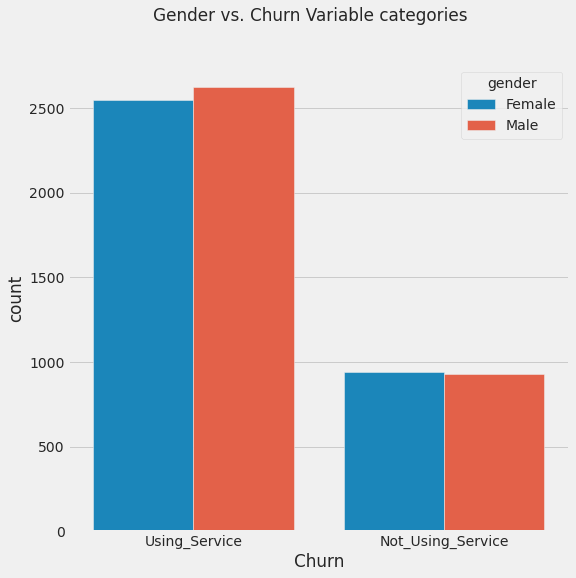

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="gender", data=Teldata,ax=ax)
ax.legend(title="gender")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("Gender vs. Churn Variable categories");

**From the code above, we can see that there are slightly more males still using the service than female counterparts,and slightly more females who stop using the service than their male counterparts.**

In [28]:
#Code below shows that we had alittle more customers without partners than those who had them.
Teldata['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [29]:
Teldata.groupby(['Partner','Churn']).customerID.count()

Partner  Churn            
No       lost_Customers       1200
         present_Customers    2441
Yes      lost_Customers        669
         present_Customers    2733
Name: customerID, dtype: int64

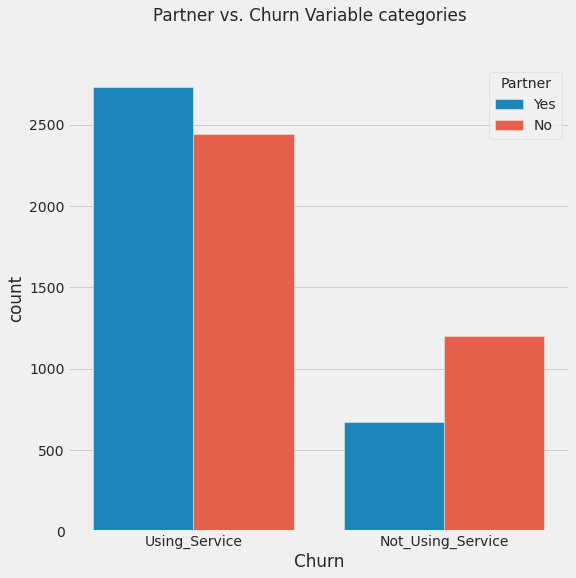

In [30]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="Partner", data=Teldata,ax=ax)
ax.legend(title="Partner")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("Partner vs. Churn Variable categories");

**From the code above, we can see that we have slightly more customers with partners using the service than those without partners. We can also see that there are less people who have stopped using the service with partners than those without partners.
This implies that probably people with partners are more contented with the service than those without partners.**

In [31]:
#Code below shows that customers with dependents are about half of those without dependents
Teldata['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [32]:
Teldata.groupby(['Dependents','Churn']).customerID.count()

Dependents  Churn            
No          lost_Customers       1543
            present_Customers    3390
Yes         lost_Customers        326
            present_Customers    1784
Name: customerID, dtype: int64

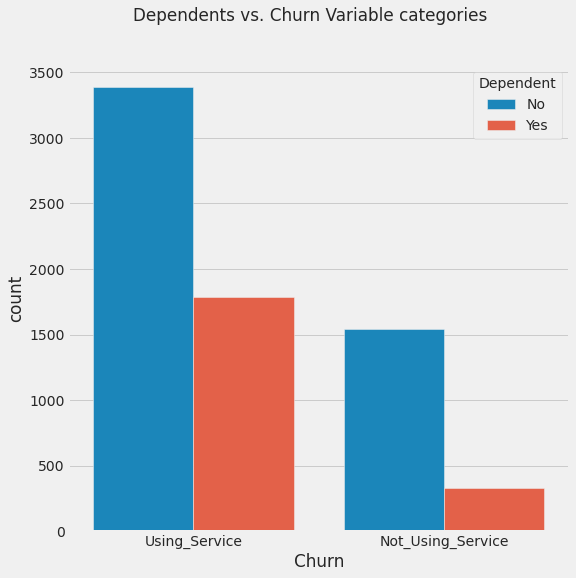

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="Dependents", data=Teldata,ax=ax)
ax.legend(title="Dependent")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("Dependents vs. Churn Variable categories");

**From the code above, we can see that the number of people using the service without dependents is slightly more than twice the number of those using with dependents
However, we can also see that we have a lot more people without dependents who have stopped using the service than those with dependents who have also stopped using the service.**

In [34]:
#Code below shows that customers not using the phone service are about 1/4 of those using it.
Teldata['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [35]:
Teldata.groupby(['PhoneService','Churn']).customerID.count()

PhoneService  Churn            
No            lost_Customers        170
              present_Customers     512
Yes           lost_Customers       1699
              present_Customers    4662
Name: customerID, dtype: int64

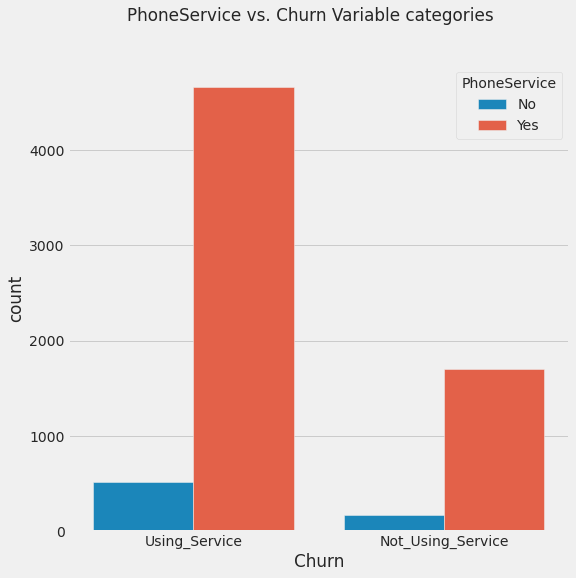

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="PhoneService", data=Teldata,ax=ax)
ax.legend(title="PhoneService")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("PhoneService vs. Churn Variable categories");

**From the code above, we have alot more people with phoneservice who are using the telcom service compared to those without phoneservice who also use the service.
However we also have alot more people who have stopped using the service with phoneservice as compared to their counterpart without phone service and they have also stopped using the service.**

In [37]:
Teldata['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

**Since we are interested in a yes or no value of multiplelines, we can reformate No phone service to be in the same category of No multiple lines.**

In [38]:
Teldata['MultipleLines']=Teldata['MultipleLines'].replace('No phone service','No')

In [39]:
Teldata['MultipleLines'].value_counts()# new value counts with increased No values.

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [40]:
Teldata.groupby(['MultipleLines','Churn']).customerID.count()

MultipleLines  Churn            
No             lost_Customers       1019
               present_Customers    3053
Yes            lost_Customers        850
               present_Customers    2121
Name: customerID, dtype: int64

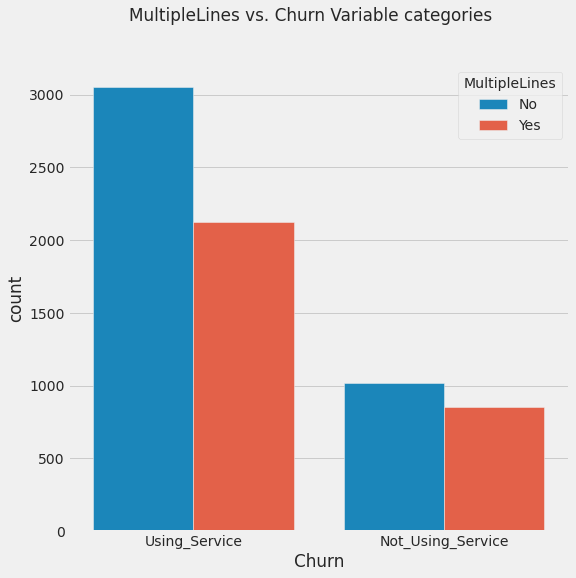

In [41]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="MultipleLines", data=Teldata,ax=ax)
ax.legend(title="MultipleLines")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("MultipleLines vs. Churn Variable categories");

**From the code above, we have much more people without multiple lines who are using the service than thier counterparts with multiple lines and are using the telcom service.
However,when u look at those who have stopped using the service,the number of those with multiple lines and those without are nearly the same.**

In [42]:
Teldata['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [43]:
Teldata.groupby(['InternetService','Churn']).customerID.count()

InternetService  Churn            
DSL              lost_Customers        459
                 present_Customers    1962
Fiber optic      lost_Customers       1297
                 present_Customers    1799
No               lost_Customers        113
                 present_Customers    1413
Name: customerID, dtype: int64

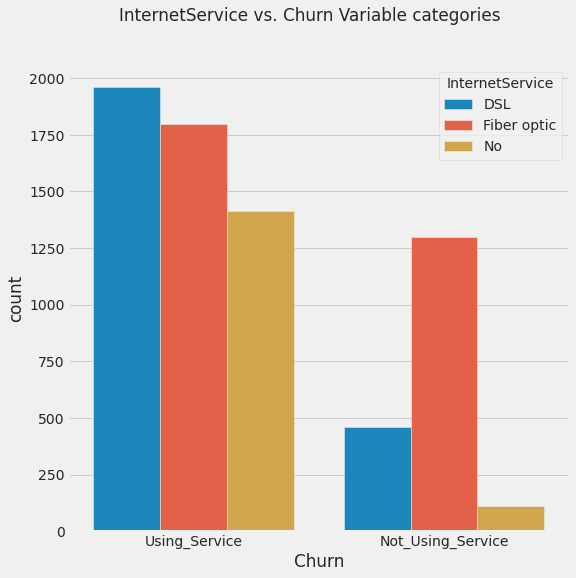

In [44]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="InternetService", data=Teldata,ax=ax)
ax.legend(title="InternetService")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("InternetService vs. Churn Variable categories");

**From the code above, we can see that the highest number of people using the telcom service comes from those using DSL and Fiber optic cables respectively then followed by those who do not use any internetService.
We can also see that the highest number of people who have stopped using the service were those who were using fibre optic cables then followed by DSL  as internet service providers. Those who were not using any internet service had the least number who had stopped using the service.**

In [45]:
Teldata['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

**Since we are interested in Yes or No value of onlinesecurity , we can reformate No internet service to be in the same category as No since one with no internet service is most likely to have no online security.**

In [46]:
Teldata['OnlineSecurity']=Teldata['OnlineSecurity'].replace('No internet service','No')

In [47]:
Teldata['OnlineSecurity'].value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

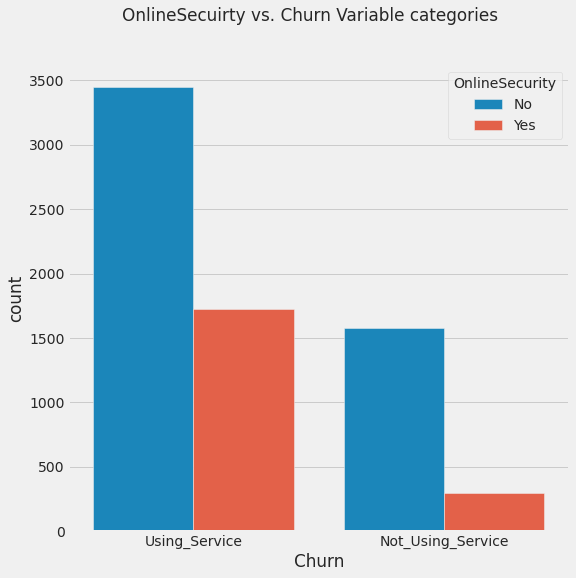

In [48]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="OnlineSecurity", data=Teldata,ax=ax)
ax.legend(title="OnlineSecurity")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("OnlineSecuirty vs. Churn Variable categories");

**We can see that there are alot more people using the service who do not have online security.
It can be noted that the number of those using the service and have online security is about half of those using the telcom service without online security.
There is generally alot more people who have stopped using the service without online security.
It can also be noted that the number who haved stopped using the service who had online security were about 1/4 of those who had stopped the service without online security.**

In [49]:
Teldata['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

**Since we are interested in a yes or no value of onlineBackup , we can reformate No internet service to be in the same category as No since one with no internet service is most likely to have no online backup.**

In [50]:
Teldata['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [51]:
Teldata['OnlineBackup']=Teldata['OnlineBackup'].replace('No internet service','No')

In [52]:
Teldata['OnlineBackup'].value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

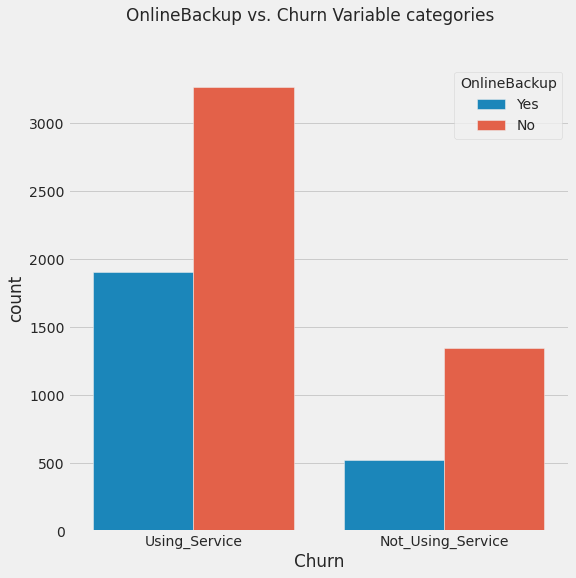

In [53]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="OnlineBackup", data=Teldata,ax=ax)
ax.legend(title="OnlineBackup")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("OnlineBackup vs. Churn Variable categories");

**The code above shows us that we have alot more people using the service without onlinebackup than those using the service with online backup.
It can also be noted that among those who stopped using the service, those with onlinebackup are close to half of those who stopped using the product without online backup.**

In [54]:
Teldata['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

**Since we are interested in a yes or no value of DeviceProtection , we can reformate No internet service to be in the same category as No assuming that device protection is over the internet and therefore one with no internet service will mostly likely not have device protection over the internet.**

In [55]:
Teldata['DeviceProtection']=Teldata['DeviceProtection'].replace('No internet service','No')

In [56]:
Teldata['DeviceProtection'].value_counts()

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

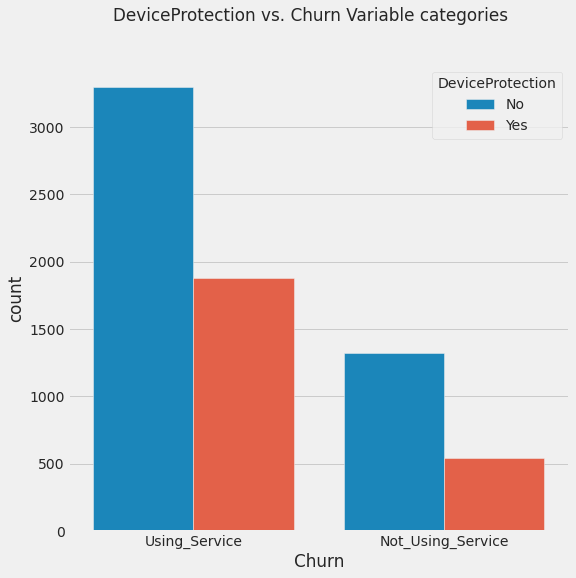

In [57]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="DeviceProtection", data=Teldata,ax=ax)
ax.legend(title="DeviceProtection")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("DeviceProtection vs. Churn Variable categories");

**From the code above, we can see that we have alot more people using the service without device protection over the internet than those using the service with device protection.
Among those who stopped using the product,those with device protection are about half of those without device protection.**

In [58]:
Teldata['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

**Considering that the specified techsupport is offered online, we can reformate No internet support to the No category since a client without internet service will not have the online techsupport.** 

In [59]:
Teldata['TechSupport']=Teldata['TechSupport'].replace('No internet service','No')

In [60]:
Teldata['TechSupport'].value_counts()

No     4999
Yes    2044
Name: TechSupport, dtype: int64

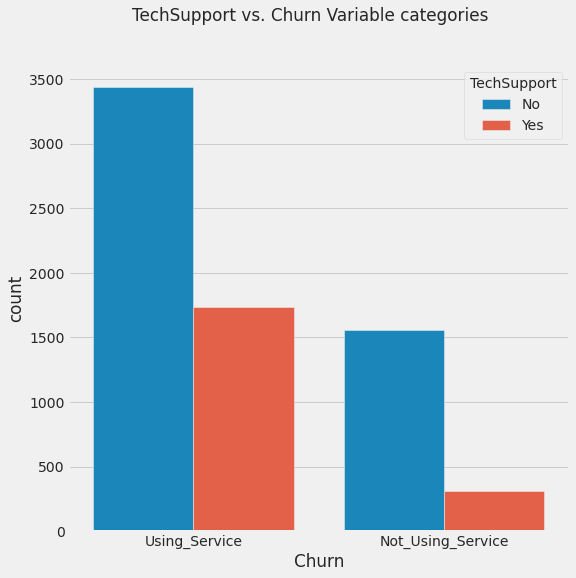

In [61]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="TechSupport", data=Teldata,ax=ax)
ax.legend(title="TechSupport")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("TechSupport vs. Churn Variable categories");

**From the code above, we can see that we have alot more people using the service without TechSupport over the internet than those using the service with TechSupport.
Among those who stopped using the Service,those with TechSupport are about 1/4 of those without TechSupport.**

In [62]:
Teldata['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

**Considering that streamingtv service is faciliated with the availability of an internet connection,
we can reformate No internet service to the No category since a client without internet service will not be able to have tv streaming.**

In [63]:
Teldata['StreamingTV']=Teldata['StreamingTV'].replace('No internet service','No')

In [64]:
Teldata['StreamingTV'].value_counts()

No     4336
Yes    2707
Name: StreamingTV, dtype: int64

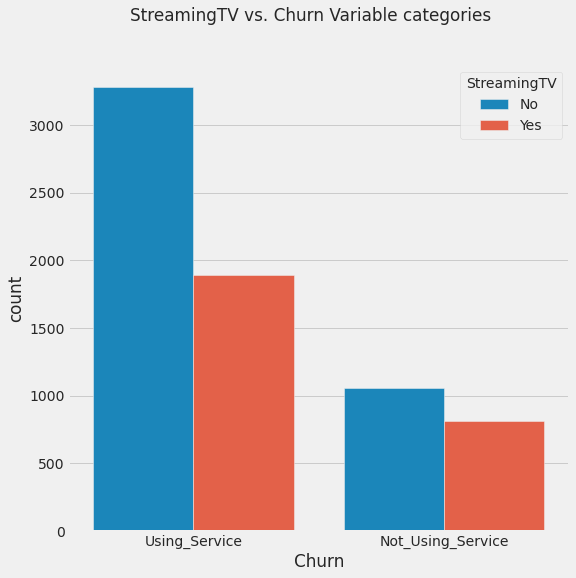

In [65]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="StreamingTV", data=Teldata,ax=ax)
ax.legend(title="StreamingTV")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("StreamingTV vs. Churn Variable categories");

**From the code above, we can see that we have alot more people using the service without TV streaming over the internet than those using the service with TV Streaming.
Among those who stopped using the Service,those who are able to have TV streaming are about 3/4 of those who are not able to have TV Streaming.**

In [66]:
Teldata['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

**Considering that streamingMovies service is faciliated with the availability of an internet connection,
we can reformate No internet service to the No category since a client without internet service will not be able to have movie streaming.**

In [67]:
Teldata['StreamingMovies']=Teldata['StreamingMovies'].replace('No internet service','No')

In [68]:
Teldata['StreamingMovies'].value_counts()

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

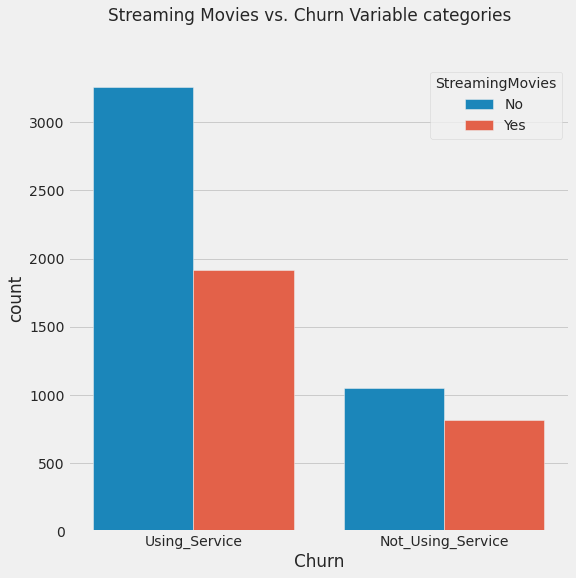

In [69]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="StreamingMovies", data=Teldata,ax=ax)
ax.legend(title="StreamingMovies")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("Streaming Movies vs. Churn Variable categories");

**From the code above, we can see that we have alot more people using the service without movie streaming over the internet than those using the service with movie Streaming over the internet
Among those who stopped using the Service,those who are able to have Movie streaming are about 3/4 of those who are not able to have movie Streaming.**

In [70]:
Teldata['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

**The code above shows us that the highest number of clients have a month to month contract with the telco company**

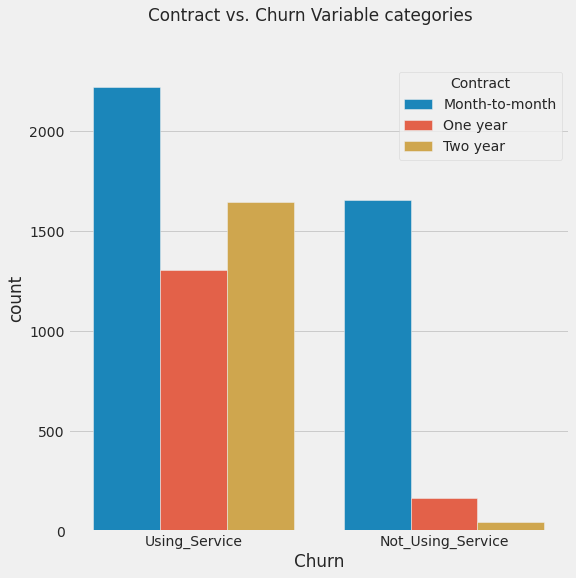

In [71]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="Contract", data=Teldata,ax=ax)
ax.legend(title="Contract")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("Contract vs. Churn Variable categories");

**The code above shows us that the highest number of clients using the service have a month to month followed by two year and lastly one year contract
Among those who have stopped using the service, month to month has the highest number, followed by one year and finally two year contract.**

In [72]:
Teldata['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

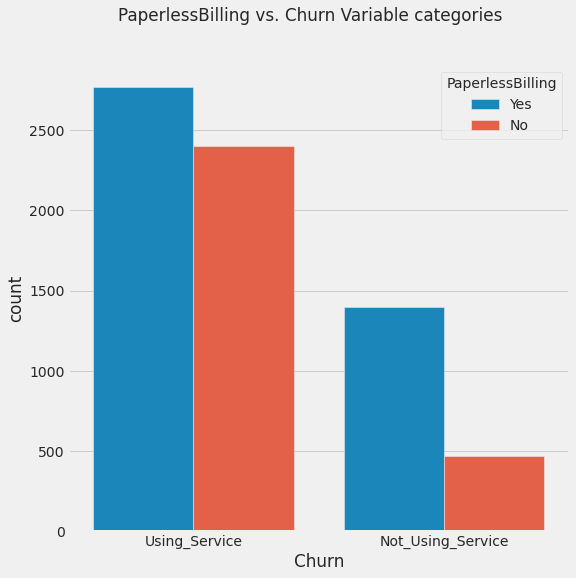

In [73]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="PaperlessBilling", data=Teldata,ax=ax)
ax.legend(title="PaperlessBilling")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("PaperlessBilling vs. Churn Variable categories");

**From the code above, we can see that the highest number of people using the service prefer to use Paperless billing, those who do not use paperless billing and are also using the service are about 3/4 of those who use paperless billing.
However, among those who stopped using the service,those who were not using paperless billing were about 1/4 of those who were using paperless billing.**

In [74]:
Teldata['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [75]:
Teldata.groupby(['PaymentMethod','Churn']).customerID.count()

PaymentMethod              Churn            
Bank transfer (automatic)  lost_Customers        258
                           present_Customers    1286
Credit card (automatic)    lost_Customers        232
                           present_Customers    1290
Electronic check           lost_Customers       1071
                           present_Customers    1294
Mailed check               lost_Customers        308
                           present_Customers    1304
Name: customerID, dtype: int64

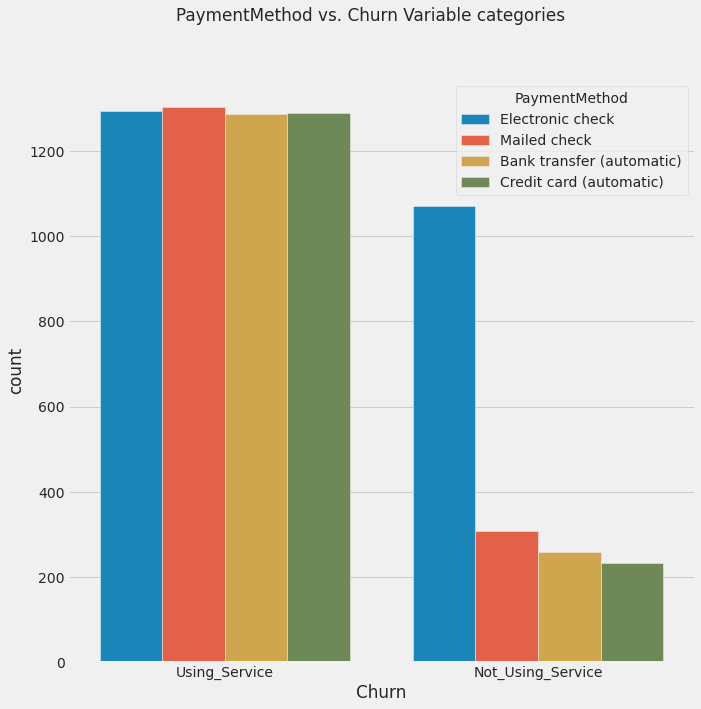

In [76]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x="Churn", hue="PaymentMethod", data=Teldata,ax=ax)
ax.legend(title="PaymentMethod")
ax.set_xticklabels(["Using_Service", "Not_Using_Service"])
ax.set_xlabel("Churn")
fig.suptitle("PaymentMethod vs. Churn Variable categories");

**From the code above, we can see that the prefered method of payment for those using the service is mailed check although the difference from the other payment methods is not so significant.
However among those who stopped using the service, the highest number of people who left the service had previously used the electronic check paymethod, then followed by mailed check,bank transfer and lastly credit card.**

# 3. CORRELATION OF FEATURES

**Let's investigate the correlation of  numerical features in relation to the target.**

In [77]:
#select the numerical columns
num_data=Teldata.loc[:,Teldata.dtypes!=np.object]

In [78]:
#Preprocess the target column to fit in the numerical data for correlation purposes
num_data['Churn']=Teldata.loc[:,'Churn']
ohot=pd.get_dummies(num_data['Churn'])

In [79]:
num_data=num_data.drop(['Churn'],axis=1)
num_data=num_data.join(ohot)

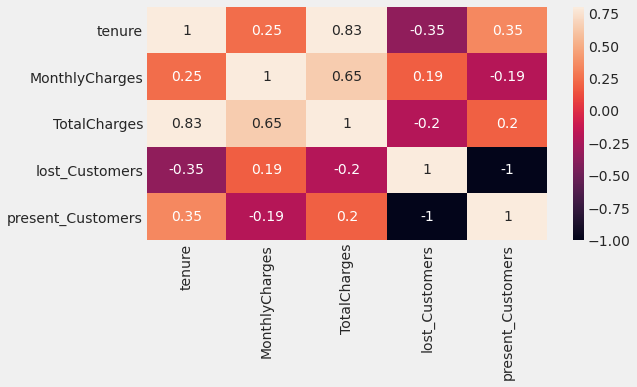

In [80]:
# heat map of correlation of features
correlation_matrix = num_data.corr()
fig = plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix,vmax=0.8,annot=True) 
plt.show()

**From the correlation matrix,the correlation coefficient of lost and present customers to all feature columns are identical in numbers, with mirroring signs (+ and -). 
We will use all  of the numerical columns here in our modelling process since the features happen to have a considerable good correlation to the churn variable.**

**We shall also use all the categorical features since our exploratory data analysis showed that each of the features has a significant effect on the churn variable**.

# 4 FEATURE ENGINEERING

In [81]:
#We will drop the customerId columns from the Teldata dataframe.
#Do some preprocessing on the Churn variable
Teldata['Churn'] = Teldata['Churn'].map({'present_Customers': 0, 'lost_Customers': 1})
train = Teldata.drop(columns=['customerID'],axis=1) 

In [82]:
Train_df_OH= pd.get_dummies(train,drop_first=True)

In [83]:
print(Train_df_OH.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [84]:
Train_df_OH.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [85]:
Train_df_OH.shape

(7043, 24)

In [86]:
target = Train_df_OH['Churn']
train = Train_df_OH.drop(columns='Churn',axis=1)

# 5. MODELLING

# Since there is an imbalance within the Churn target variable, we are going to build two models where,
# 1. We build our model with  the imbalanced churn variable
# 2. We build our model with a balanced churn variable  using SMOTE

**1. Model with imbalanced churn Variable.**

In [87]:
#stratified sampling ensures the even distribution of classes of the target variable.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,target, test_size=0.2, random_state=1,
                                                    stratify=target)

In [88]:
X_train.shape , y_train.shape, X_test.shape,y_test.shape

((5634, 23), (5634,), (1409, 23), (1409,))

In [89]:
#Function to train and evaulate a given model
def fit_Evaulate(model,X_train,y_train):
    
    model.fit(X_train, y_train)
    y_pred=model.predict_proba(X_test)[:,1]#predict probabilities for positive class
    auc = roc_auc_score(y_test, y_pred)
    score=model.score(X_train,y_train)*100
    
    return auc,score   

# Model evaluations on various models.

1. LOGISTIC REGRESSION

2. SUPPORT VECTOR CLASSIFIER

3. K-NEAREST NEIGHBOUR CLASSIFIER

4. RANDOM FOREST CLASSIFIER

5. GRADIENT BOOSTING CLASSIFIER

In [90]:
Log_Reg=LogisticRegression()
lOGR_auc,LOG_R_Score = fit_Evaulate(Log_Reg,X_train,y_train)
print("The Logistic Regression train Accuracy = %.2f"%(LOG_R_Score))
print('Logistic ROC AUC for test data: ROC AUC=%.3f' % (lOGR_auc))

The Logistic Regression train Accuracy = 80.69
Logistic ROC AUC for test data: ROC AUC=0.834


In [91]:
SVC_clf =SVC(probability=True)
SVC_auc,SVC_Score = fit_Evaulate(SVC_clf,X_train,y_train)
print("The SVC train Accuracy = %.2f"%(SVC_Score))
print('SVC ROC AUC for test data: ROC AUC=%.3f' %(SVC_auc))

The SVC train Accuracy = 73.46
SVC ROC AUC for test data: ROC AUC=0.780


In [92]:
KNN_clf = KNeighborsClassifier(n_neighbors = 3)
KNN_auc,KNN_Score = fit_Evaulate(KNN_clf,X_train,y_train)
print("The KNeighbors Classifier train Accuracy = %.2f"%(KNN_Score))
print('KNN ROC AUC for test data: ROC AUC=%.2f' %(KNN_auc))

The KNeighbors Classifier train Accuracy = 85.89
KNN ROC AUC for test data: ROC AUC=0.73


In [93]:
RF_clf = RandomForestClassifier(n_estimators=100,class_weight="balanced")
RF_auc,RF_Score = fit_Evaulate(RF_clf,X_train,y_train)
print("The Random Forest train Accuracy = %.2f"%(RF_Score))
print('Random Forest ROC AUC for test data: ROC AUC=%.2f' %(RF_auc))

The Random Forest train Accuracy = 99.77
Random Forest ROC AUC for test data: ROC AUC=0.81


In [94]:
GB_clf = GradientBoostingClassifier(n_estimators=100)
GB_auc,GB_Score = fit_Evaulate(GB_clf,X_train,y_train)
print("Gradient Boosting Classifier train Accuracy = %.2f"%(GB_Score))
print('Gradient Boosting ROC AUC for test data: ROC AUC=%.2f' %(GB_auc))

Gradient Boosting Classifier train Accuracy = 82.37
Gradient Boosting ROC AUC for test data: ROC AUC=0.84


# Visualise the Train accuracy of the models.

<Figure size 864x720 with 0 Axes>

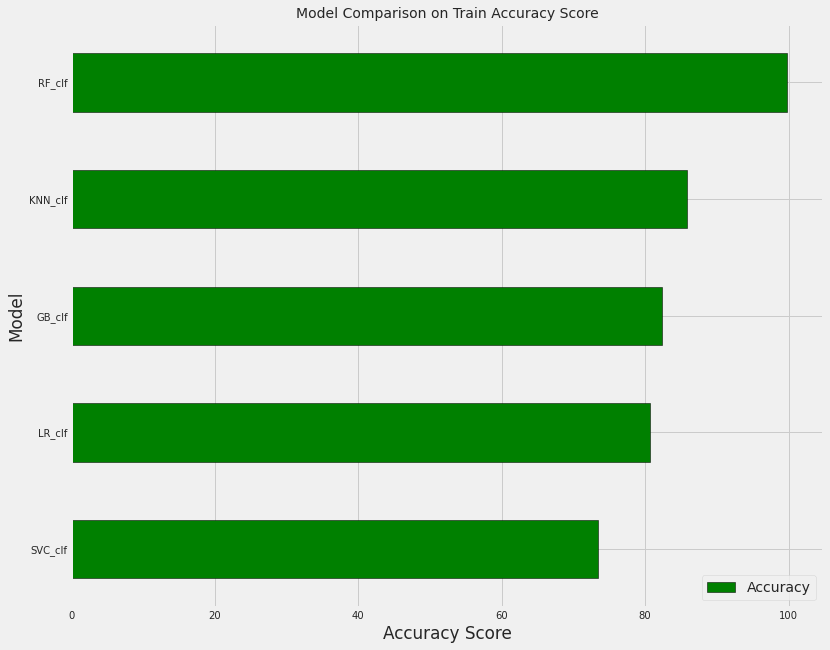

In [95]:
figsize(12,10)
fig = plt.figure()

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['LR_clf', 'SVC_clf',
                                           'KNN_clf', 'RF_clf',
                                            'GB_clf'],
                                 'Accuracy': [LOG_R_Score,SVC_Score,KNN_Score,RF_Score,GB_Score ]})

# Horizontal bar chart of train accuracy
model_comparison.sort_values('Accuracy').plot(x = 'model', y = 'Accuracy', 
                                kind = 'barh',color = 'Green', edgecolor = 'black')
# Plot formatting
plt.ylabel('Model'); plt.yticks(size = 10); plt.xlabel('Accuracy Score'); plt.xticks(size = 10)
plt.title('Model Comparison on Train Accuracy Score', size = 14);

**From the bar graph above, we can see that the Random forest classifier has the best accuracy performance on the train data. However since the data  has a class imbalance in the customer churn variable, we shall use the roc_auc metric to select the best model for evaluation performance**.

**We are going to use a bar graph below to visualise the model that produced the highest roc_auc,
which will become the model that we shall tune for our classification problem.**

<Figure size 864x720 with 0 Axes>

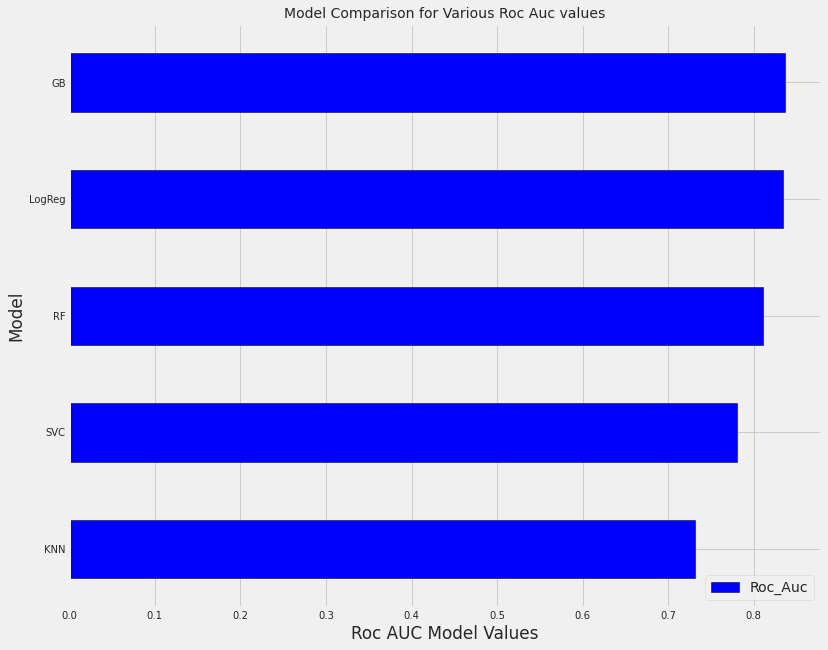

In [96]:
figsize=(12,10)
fig = plt.figure()

# Dataframe to hold ROC_AUC results
ROC_AUC_comparison = pd.DataFrame({'model': ['LogReg', 'SVC',
                                           'KNN', 'RF',
                                            'GB'],
                                 'Roc_Auc': [lOGR_auc,SVC_auc,KNN_auc,RF_auc,GB_auc ]})

# Horizontal bar chart of Roc_auc values
ROC_AUC_comparison.sort_values('Roc_Auc').plot(x = 'model', y = 'Roc_Auc', 
                                kind = 'barh',color = 'Blue', edgecolor = 'black')
# Plot formatting
plt.ylabel('Model'); plt.yticks(size = 10); plt.xlabel('Roc AUC Model Values'); plt.xticks(size = 10)
plt.title('Model Comparison for Various Roc Auc values', size = 14);
plt.show()

**The best performing models are Gradient Boosting classifiers and logistic regression**

Lets consider the two possible models, Logistic regression and gradient boosting and furthure tune them to find out which one performs better.
**We shall use grid search to find optimum parameters**

In [97]:
LR_model= LogisticRegression()

grid_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] , 'penalty':['l1','l2'] }

In [98]:
from sklearn.model_selection import GridSearchCV

LR_grid= GridSearchCV(LR_model,grid_parameters,cv=10)

In [99]:
LR_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [100]:
print(LR_grid.best_params_)

{'C': 10, 'penalty': 'l2'}


In [101]:
y_pred_ProbLOGLR=LR_grid.predict_proba(X_test)[:,1]#predict probabilities for positive class
lr_auc_grid = roc_auc_score(y_test, y_pred_ProbLOGLR)
LOG_R_score=LR_grid.score(X_train,y_train)*100
print("The Logistic Regression grid train Accuracy = %.2f"%(LOG_R_score))
print('Logistic ROC AUC for test data on grid search: ROC AUC=%.3f' % (lr_auc_grid))

The Logistic Regression grid train Accuracy = 80.55
Logistic ROC AUC for test data on grid search: ROC AUC=0.834


**The grid perform obtained from tuning logistic regression does not defer from the default model performance**

**Lets now tune the gradient boosting classifier**

In [102]:
model = GradientBoostingClassifier(random_state=1)

In [103]:
# parameter grid

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.5, 0.1, 0.2],
    "min_samples_leaf": [2,3,4,6],
    "max_depth":[3,5,7,10,15],
    "max_features":["log2","sqrt"],
     'subsample': [0.6,0.7,0.8],
    "n_estimators":[300,400,500,800,1000]
     }

In [104]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=parameters,
                               scoring='roc_auc',
                               cv=10, n_iter=30, 
                               n_jobs = -1, verbose = 1, 
                               random_state=42)

In [105]:
random_cv.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.9min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.5, 0.1, 0.2],
                                        'loss': ['deviance'],
                                        'max_depth': [3, 5, 7, 10, 15],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 6],
                                        'n_estimators': [300, 400, 500, 800,
                                                         1000],
                                        'subsample': [0.6, 0.7, 0.8]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [106]:
random_cv.best_params_

{'subsample': 0.6,
 'n_estimators': 500,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 3,
 'loss': 'deviance',
 'learning_rate': 0.01}

In [107]:
random_cv.best_score_

0.8521961937226041

In [108]:
#Retrainig our model with grid search to optimize it's performance by varying the estimaators
# Create a range of trees to evaluate
# max_features ='sqrt',
param_grid = {'n_estimators': [200,300,400,500 ],"max_features":["log2","sqrt"]}
model =  GradientBoostingClassifier(max_depth=3,
                                   loss = 'deviance',
                                   subsample=0.6,
                                   learning_rate=0.01,
                                   min_samples_leaf = 6,
                                  random_state = 4)

In [109]:
grid_clf =GridSearchCV(GradientBoostingClassifier(random_state=1), 
                   param_grid,scoring='roc_auc',cv=5, n_jobs=-1)

In [110]:
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'max_features': ['log2', 'sqrt'],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='roc_auc')

In [111]:
grid_clf.best_estimator_

GradientBoostingClassifier(max_features='log2', n_estimators=200,
                           random_state=1)

In [112]:
 grid_clf.best_score_

0.8484996725928944

**We can note that the Gradient boosting classifier performed much better than Logistic Regression.
Tuning the gradient boosting classifier with Random search and grid search produced similar results.
We shall consider the final performance of grid search as the model to use to make our prediction.**

In [113]:
final_model_GB=grid_clf.best_estimator_

In [114]:
y_pred=final_model_GB.predict_proba(X_test)[:,1]#predict probabilities for positive class
#code below will threshold the probabilities to give class predictions
y_pred = np.where(y_pred > 0.5, 1,0)

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



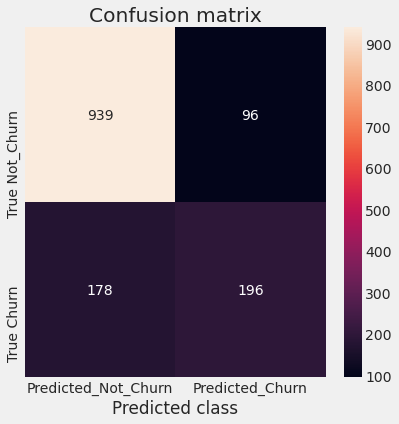

In [116]:
#comfusion matrix plot
Label_1 = ['Predicted_Not_Churn', 'Predicted_Churn']
Label_2 = [ 'True Not_Churn','True Churn', ]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=Label_1, yticklabels=Label_2, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('')
plt.xlabel('Predicted class')
plt.show()

**From the heatmap above, we can see that the model mis-classified 96 customers as False Positives(FP), implying that it classified them among customers who stopped using the service and yet they are still using the telcom service in the true sense.
The model also mis-classified 178 customers as False Negatives (FN), implying that it classified them among those customers who were using the service and yet in real sense they had stopped using the service**.

In [117]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(final_model_GB, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0436 ± 0.0107,tenure
0.0346 ± 0.0137,MonthlyCharges
0.0312 ± 0.0085,TotalCharges
0.0248 ± 0.0077,InternetService_Fiber optic
0.0175 ± 0.0061,Contract_Two year
0.0142 ± 0.0069,Contract_One year
0.0123 ± 0.0129,InternetService_No
0.0084 ± 0.0070,PaperlessBilling_Yes
0.0074 ± 0.0041,TechSupport_Yes
0.0064 ± 0.0056,SeniorCitizen_1


# **We can see that Tenure, Monthly Charges and Total Charges  are the three most important features that this model considered in classifying which customers will churn or not.**

# 2. Building a Model with Balanced Churn Variable Values.

**Balancing the Training Dataset**

**The Churn customer takes only 26.7 % therefore a need to balance it.
To balance the dataset, we will utilize SMOTE. SMOTE (Synthetic Minority Oversampling Technique) consists of synthesizing elements for the minority class, based on those that already exist. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.**

**First we split our training and test data. SMOTE will be applied only to training dataset so that the prediction will use original dataset with no synthetic datapoints**

In [118]:
from imblearn.over_sampling import SMOTE
sm_object = SMOTE(sampling_strategy='minority', k_neighbors=9, random_state=2)
X_train_res, y_train_res = sm_object.fit_resample(X_train, y_train)

In [119]:
#original train and y_train
X_train.shape, y_train.shape

((5634, 23), (5634,))

In [120]:
#orginal churn distribution
print(np.bincount(y_train))

[4139 1495]


In [121]:
#New train shapes after transformation with added synthetic points.
X_train_res.shape, y_train_res.shape

((8278, 23), (8278,))

In [122]:
#This code below shows that the initial imbalance in the samples of the churn variable is removed.
#This create 4139 pos-tives and 4139 negatives in the churn variable.
# close to 3000 synthetic points are added to balance the churn values distribution.
print(np.bincount(y_train_res))

[4139 4139]


**We can now follow through with the same approach of training the models we looked at before to compare the results.**

**Lets train and evaulate the following models**

1.  LogisticRegression
2.  SVC Classifier
3.  K- Nearest Neighbour Classifier
4.  Random Forest Classifier
5.  Gradient Boosting Classifier**

In [123]:
Log_Reg=LogisticRegression()
lr_auc2,LOG_R_Score2 = fit_Evaulate(Log_Reg,X_train_res,y_train_res)
print("The Logistic Regression train Accuracy = %.2f"%(LOG_R_Score2))
print('Logistic ROC AUC for test data: ROC AUC=%.3f' % (lr_auc2))

The Logistic Regression train Accuracy = 82.59
Logistic ROC AUC for test data: ROC AUC=0.813


In [124]:
SVC_clf =SVC(probability=True)
SVC_auc2,SVC_Score2 = fit_Evaulate(SVC_clf,X_train_res,y_train_res)
print("The SVC train Accuracy = %.2f"%(SVC_Score2))
print('SVC ROC AUC for test data: ROC AUC=%.3f' %(SVC_auc2))

The SVC train Accuracy = 66.03
SVC ROC AUC for test data: ROC AUC=0.735


In [125]:
KNN_clf = KNeighborsClassifier(n_neighbors = 3)
KNN_auc2,KNN_Score2 = fit_Evaulate(KNN_clf,X_train_res,y_train_res)
print("The KNeighbors Classifier train Accuracy = %.2f"%(KNN_Score2))
print('KNN ROC AUC for test data: ROC AUC=%.2f' %(KNN_auc2))

The KNeighbors Classifier train Accuracy = 87.23
KNN ROC AUC for test data: ROC AUC=0.73


In [126]:
RF_clf = RandomForestClassifier(n_estimators=100,class_weight="balanced")
RF_auc2,RF_Score2 = fit_Evaulate(RF_clf,X_train_res,y_train_res)
print("The Random Forest train Accuracy = %.2f"%(RF_Score2))
print('Random Forest ROC AUC for test data: ROC AUC=%.2f' %(RF_auc2))

The Random Forest train Accuracy = 99.84
Random Forest ROC AUC for test data: ROC AUC=0.81


In [127]:
GB_clf = GradientBoostingClassifier(n_estimators=100)
GB_auc2,GB_Score2 = fit_Evaulate(GB_clf,X_train_res,y_train_res)
print("Gradient Boosting Classifier train Accuracy = %.2f"%(GB_Score2))
print('Gradient Boosting ROC AUC for test data: ROC AUC=%.2f' %(GB_auc2))

Gradient Boosting Classifier train Accuracy = 85.42
Gradient Boosting ROC AUC for test data: ROC AUC=0.82


We can also see from the code above even with the resampled churn variable, the random forest classifier has the best performance, however just as before, we shall use the roc_auc metric to determine the model with the best performance for this kind of data.

<Figure size 864x720 with 0 Axes>

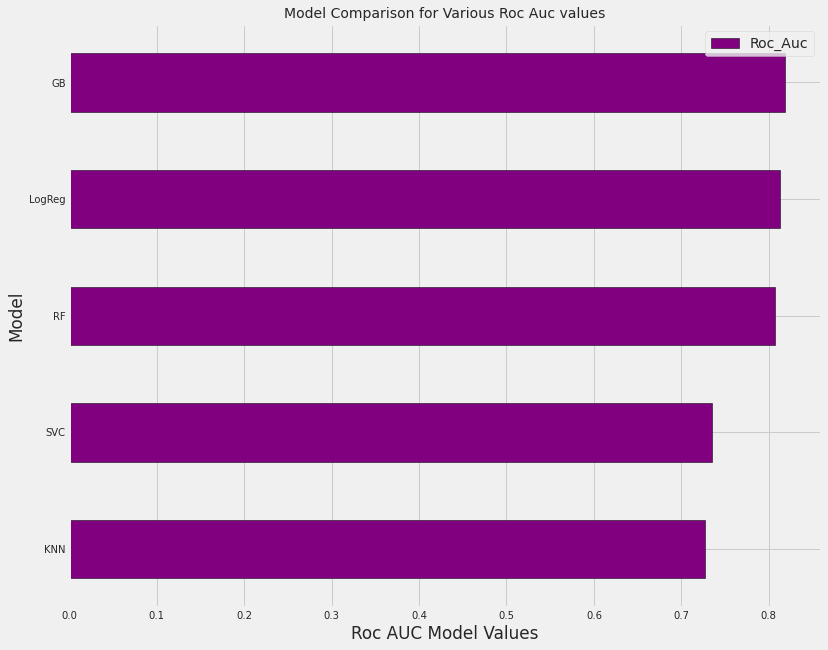

In [128]:
figsize=(12,10)
fig = plt.figure()

# Dataframe to hold ROC_AUC results
ROC_AUC_comparison = pd.DataFrame({'model': ['LogReg', 'SVC',
                                           'KNN', 'RF',
                                            'GB'],
                                 'Roc_Auc': [lr_auc2,SVC_auc2,KNN_auc2,RF_auc2,GB_auc2 ]})

# Horizontal bar chart of Roc_auc values
ROC_AUC_comparison.sort_values('Roc_Auc').plot(x = 'model', y = 'Roc_Auc', 
                                kind = 'barh',color = 'Purple', edgecolor = 'black')
# Plot formatting
plt.ylabel('Model'); plt.yticks(size = 10); plt.xlabel('Roc AUC Model Values'); plt.xticks(size = 10)
plt.title('Model Comparison for Various Roc Auc values', size = 14);
plt.show()

**We can take note again that the Gradient boosting classifier is slightly a better classifier than Logistic Regression as well as when compared to the other classifiers.
We shall then Proceed to fine tune the Gradient boosting classfier to obtain an optimum performance.**

In [129]:
model = GradientBoostingClassifier(random_state=2)

In [130]:
# parameter grid

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.5, 0.1, 0.2],
    "min_samples_leaf": [2,3,4,6],
    "max_depth":[3,5,7,10,15],
    "max_features":["log2","sqrt"],
     'subsample': [0.6,0.7,0.8],
    "n_estimators":[300,400,500,800,1000]
     }

In [131]:
#we make use of the random search to get baseline parameters for the model.
from sklearn.model_selection import RandomizedSearchCV
random_cv2 = RandomizedSearchCV(estimator=model,
                               param_distributions=parameters,
                               scoring='roc_auc',
                               cv=10, n_iter=30, 
                               n_jobs = -1, verbose = 1, 
                               random_state=42)

In [132]:
random_cv2.fit(X_train_res,y_train_res)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.9min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=2),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.5, 0.1, 0.2],
                                        'loss': ['deviance'],
                                        'max_depth': [3, 5, 7, 10, 15],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 6],
                                        'n_estimators': [300, 400, 500, 800,
                                                         1000],
                                        'subsample': [0.6, 0.7, 0.8]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [133]:
random_cv2.best_params_

{'subsample': 0.8,
 'n_estimators': 1000,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 3,
 'loss': 'deviance',
 'learning_rate': 0.1}

In [134]:
random_cv2.best_score_

0.927999864465774

In [135]:
#Retrainig our model with grid search to optimize it's performance by varying the estimaators
# Create a range of trees to evaluate
# max_features ='sqrt',
param_grid2 = {'n_estimators': [400,500,600,800,1000],"max_features":["log2","sqrt"]}
model =  GradientBoostingClassifier(max_depth=3,
                                   loss = 'deviance',
                                   subsample=0.8,
                                   learning_rate=0.1,
                                   min_samples_leaf = 4,
                                  random_state = 2)

In [136]:
grid2_clf =GridSearchCV(GradientBoostingClassifier(random_state=1), 
                   param_grid2,scoring='roc_auc',cv=5, n_jobs=-1)

In [137]:
grid2_clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'max_features': ['log2', 'sqrt'],
                         'n_estimators': [400, 500, 600, 800, 1000]},
             scoring='roc_auc')

In [138]:
grid2_clf.best_estimator_

GradientBoostingClassifier(max_features='log2', n_estimators=1000,
                           random_state=1)

In [139]:
grid2_clf.best_score_

0.9238633283189586

We can therefore see that rebalancing the churn variable produced much better results of the model from roc_auc value of 85% to 92%. hence a better classifying model.
We shall therefore consider is as our final classifier for the model.

In [140]:
final_model2_GB=grid2_clf.best_estimator_

In [141]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(final_model2_GB, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1402 ± 0.0172,MonthlyCharges
0.0606 ± 0.0144,tenure
0.0590 ± 0.0062,InternetService_Fiber optic
0.0342 ± 0.0116,TotalCharges
0.0268 ± 0.0118,OnlineBackup_Yes
0.0229 ± 0.0072,DeviceProtection_Yes
0.0211 ± 0.0053,StreamingMovies_Yes
0.0209 ± 0.0079,MultipleLines_Yes
0.0183 ± 0.0127,OnlineSecurity_Yes
0.0176 ± 0.0058,TechSupport_Yes


In [142]:
y_pred2=final_model2_GB.predict_proba(X_test)[:,1]#predict probabilities for positive class
#code below will threshold the probabilities to give class predictions
y_pred2 = np.where(y_pred2 > 0.5, 1,0)

In [143]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.57      0.59      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.78      0.78      1409



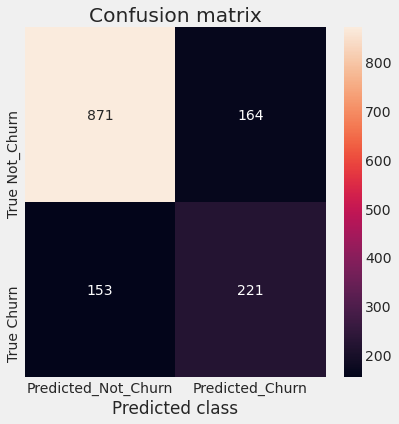

In [144]:
#comfusion matrix plot
Label_1 = ['Predicted_Not_Churn', 'Predicted_Churn']
Label_2 = [ 'True Not_Churn','True Churn', ]
conf_matrix = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=Label_1, yticklabels=Label_2, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('')
plt.xlabel('Predicted class')
plt.show()

# CONCLUSION
# The resultant confusion matrix above show that there was an increase in the false positives as compared to the earlier confusion matrix from 96 to 164  and a decrease in the false negatvies from 178 to 153
# If the cost for the false positives is much high than the cost for false negatives, then more measures would be taken to mitigate possible higher customer churn.